In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
songs_df = pd.read_csv('Most_Streamed_Spotify_Songs_2024.csv')
songs_df.describe()


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [8]:
print(songs_df.dtypes)



Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [9]:
songs_df = songs_df.drop(columns=['TIDAL Popularity'])

In [10]:
#print(songs_df['Release Date'].unique)
songs_df['Release Date'] = pd.to_datetime(songs_df['Release Date'], format='%m/%d/%Y')
songs_df['Year'] = songs_df['Release Date'].dt.year

print(songs_df.Year.unique())


[2024 2023 2022 2021 2015 2019 2017 2020 2018 2016 2011 2013 2014 2012
 2010 2009 2000 2005 2004 1994 2008 2002 2007 2003 2006 1999 1987 1998
 2001 1991]


In [11]:
songs_df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1,2024


<Figure size 400x600 with 0 Axes>

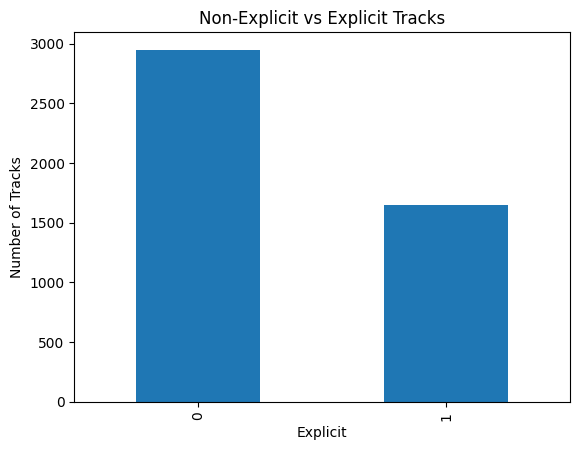

In [15]:
explicit_tracks = songs_df.groupby('Explicit Track')['Track'].count()

plt.figure(figsize=(4,6))
fig, ax = plt.subplots()
explicit_tracks.plot(kind='bar')
plt.title('Non-Explicit vs Explicit Tracks')
plt.ylabel("Number of Tracks")
plt.xlabel('Explicit')
plt.show()

<Figure size 800x600 with 0 Axes>

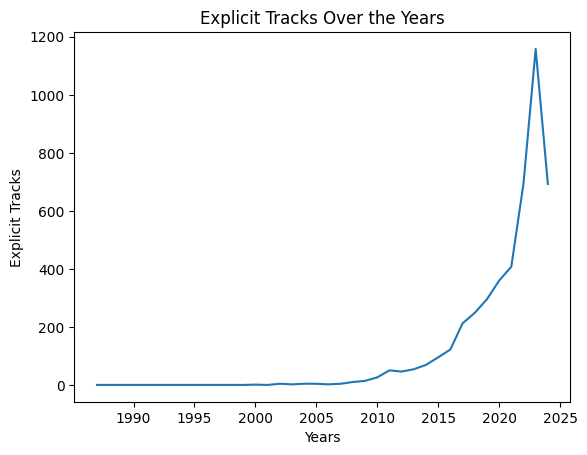

In [24]:
plt.figure(figsize=(8,6))
fig, ax  = plt.subplots()
explicit_tracks = songs_df[songs_df['Explicit Track']== 1]
explicit_tracks_year = songs_df.groupby('Year')['Explicit Track'].count()
plt.plot(explicit_tracks_year)
plt.title('Explicit Tracks Over the Years')
plt.ylabel('Explicit Tracks')
plt.xlabel('Years')
plt.show()